# Nonlinear supervised learning: part 1

In this notebook we start off on our journey towards understanding the fundamentals of nonlinear supervised learning, and the main tools used to tackle such problems.  We focus here on flushing out two basic ways of viewing a mathematical function.  We then see how a critical issue related to one of these views relates fundamentally to the problem of nonlinear supervised learning.  This understanding helps frame and motivate the use of *function approximators* - that is kernels, neural networks, and decision trees - introduced in the notebook following this one.

>The content of this notebook is supplementary material for the textbook Machine Learning Refined (Cambridge University Press, 2016). Visit http://www.mlrefined.com for free chapter downloads and tutorials, and [our Amazon site here](https://www.amazon.com/Machine-Learning-Refined-Foundations-Applications/dp/1107123526/ref=sr_1_1?ie=UTF8&qid=1474491657&sr=8-1&keywords=machine+learning+refined) for details regarding a hard copy of the text.

In [2]:
# run this cell to import all necessary libraries for the notebook experiments
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sys

# 1.  Function fundamentals

Here we discuss a number of fundamental concepts regarding mathematical functions that will be very useful in our future discussions of nonlinear supervised learning.  This includes two common ways of viewing mathematical functions: as an equation or formula, and as a table of values (or collection of *data*).

## 1.1  The equation view of mathematical functions

In secondary school math classes you learn about all sorts of mathematical functions: lines, parabolas, polynomials, sine waves, etc.,  A function is just a rule for transforming inputs into an associated set of outputs - like a recipe they tell you how to transform ingredient(s) into a useful product.  

One of the primary ways we are taught to think about mathematical functions is via their *equation* or *formula* -  in other words by their explicit rule(s).  For example, take the commonly taught equation of a line

$$ y = w_0 + w_1x$$

This is an explicitly written rule for taking an input $x$ and transforming it into an associated $y$.  Given a specific input $x$ how do we transform it to get its associated output?  We multiply it by the weight $w_1$ and add the weight $w_0$.  

Lets plot a picture of this rule in the next cell - here the line is shown in red.  In this plot we've set $w_0 = 3$ and $w_1 = -2$, one instance of a line.  We're plotting it over the input range (values of x) from -5 to 5.

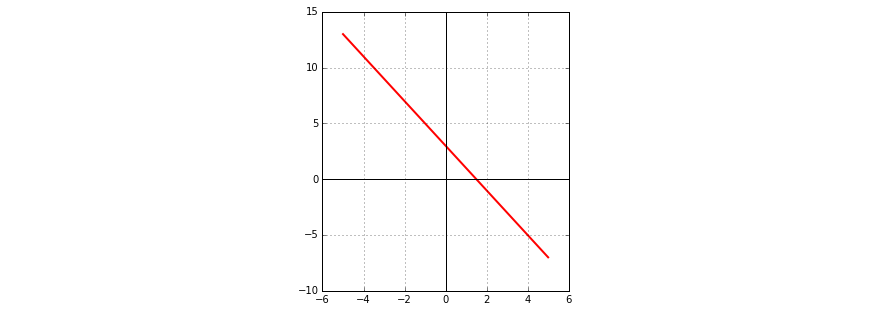

In [15]:
# draw a line over a small range of its input
x = np.linspace(-5,5,50)               # range of input for our functions
w_0 = 3
w_1 = -2
y = w_0 + w_1*x
line_table = np.stack((x,y),axis = 1)  # make table of values for our function

# plot line
fig = plt.figure(figsize = (15,5))
ax = fig.add_subplot(131)   # add empty panel to center plot
ax.axis('off')
ax = fig.add_subplot(133)   # add empty panel to center plot
ax.axis('off')
ax = fig.add_subplot(132)
ax.plot(line_table[:,0],line_table[:,1],c='r',linewidth=2)

# clean up plot, plot x and y axes
s = np.linspace(-10,10)
ax.grid(True, which='both')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.show()

Lets breifly take a look at one more example.

Another common function we learn about in secondary school is the *parabola*. To get a parabola we just square the input $x$ and add it to the line above - a simple enough adjustment whose equation looks like

$$ y = w_0 + w_1x + w_2x^2$$

We can plot a parabola with explicit values for the weights $w_0$, $w_1$, and $w_2$ as in the next cell.  In particular we've set $w_0 = 3$, $w_1 = -2$, and $w_2 = 5$.  We're plotting it over the input range (values of x) from -5 to 5.

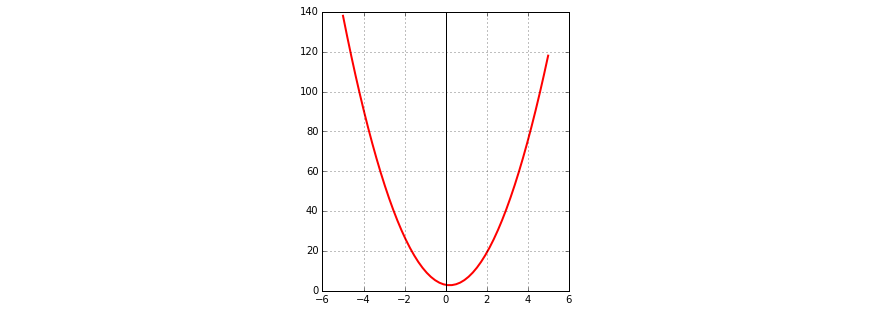

In [17]:
# draw a line over a small range of its input
x = np.linspace(-5,5,50)                     # range of input for our functions
w_0 = 3
w_1 = -2
w_2 = 5
y = w_0 + w_1*x + w_2*x**2
parabola_table = np.stack((x,y),axis = 1)    # make table of values for our function

# plot line
fig = plt.figure(figsize = (15,5))

ax = fig.add_subplot(131)   # add empty panel to center plot
ax.axis('off')
ax = fig.add_subplot(133)   # add empty panel to center plot
ax.axis('off')

ax = fig.add_subplot(132)
ax.plot(parabola_table[:,0],parabola_table[:,1],c='r',linewidth=2)

# clean up plot, plot x and y axes
s = np.linspace(-10,10)
ax.grid(True, which='both')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.show()

Writing down the equation of the line, parabola, or any function gives us *its rule*, its recipe for transforming inputs into outputs.  This is the *equation-view of a mathematical function*.

>One valid way to think about a function is that it *is* its equation - its explicitly defined rule for transforming inputs into outputs.  We call this the *equation view* of a mathematical function.

## 1.2  The equation view of mathematical functions

Another way to think about a function is to view it as the actual set of input/output pairs defined by its equation - or in other words as a table of values.  *This is how we actually graph functions like the ones above - we plug in various input values into the function's equation and print show the associated table of values.*  

For a function like a line - whose equation is given in general as 

$$ y = w_0 + w_1x$$

this table of values is a collection of *infinitely many* pairs that we can list off one-by-one (we plotted just a subsample of these pairs previously).  Say for example that $w_0 = 3$ and $w_1 =-2$ as in the plot above, then the associated table of values (listed in no particular order) looks like this

$$\begin{array}{c|c}
~~ \text{Input} ~ (x) &  ~~ \text{Output} ~~ (y = 3 -2 x) \\
\hline 0 & 3 \\
\ -0.4 & 3.8 \\
\ 5.2 & -7.2 \\
\vdots & \vdots\\
\end{array}$$

The three vertical dots in each colunm indicate that we could keep on going - listing input and output pairs - forever.   So we can find - somewhere on this infinitely long table - the input/output pair for any input number we can think of.  

When we take *the table view* of a function we view it as a (possibly infinitely long) listing of explicit input/output pairs, *not as its equation*.  In other words, we think of the function as a collection of input/output data points.  

As with the line - we can view a parabola as its equation or as its associated table of values.  For the choice of weights used in the plotting cell above this is an infinitely long table of values that looks like this

$$\begin{array}{c|c}
~~ \text{Input} ~(x) & \text{Output}  ~~ (y = 3 -2 x + 5x^2) \\
\hline 0 & 3 \\
\ -0.4 & 4.6 \\
\ 5.2 & 127.8 \\
\vdots & \vdots\\
\end{array}$$

As with the line, the three vertical dots in each column indicate that this list is infinitely long.  Any input scalar value we can think of will be found at some point on this table.  Again as with the line - we showed a plot of this parabola earlier by making a short table of its values - created from the function's equation - over a defined input interval.

>Another way to think about a function is as a (possibly infinitely long) table of explicit input/output values.  We call this the *table view* of a mathematical function.  Using a subset of these table values we can visualize (i.e,. graph) functions with one or two inputs.

This duality - on how to think about mathematical functions - is universal, holding for any function of a single input or a function many inputs too.  Its actually even more general than this as well - **any table of values can be interpreted as a function, regardless of whether or not we know the equation of the function that generated it.**  

For example, say we had the same table of values we had earlier when we used the equation of the line $ y = 3 - 2x$.

$$\begin{array}{c|c}
~~ \text{Input} ~ (x) &  ~~ \text{Output} ~~ (y) \\
\hline 0 & 3 \\
\ -0.4 & 3.8 \\
\ 5.2 & -7.2 \\
\vdots & \vdots\\
\end{array}$$

This table still defines a function - but now we don't know its equation!  We only have its table of values now.  

Notice too that the plots as shown above are not *continuous*, although they appear so.  Those plots we made above are actually kind of a trick - an optical illusion.  If you look closely you can see that we only *sampled* input/output data points for each function's table - that is we did not plot all infinitely many, just a small sampling of them.  The plots *look* continuous - the way we might draw them using pencil and paper - because we chose a plotting function from Python's matplotlib that visually *interpolates* smoothly between points it plots.  If we use *scatter* to plot the data instead you can really see all the input/output points we defined individually.  We do this in the next Python cell.

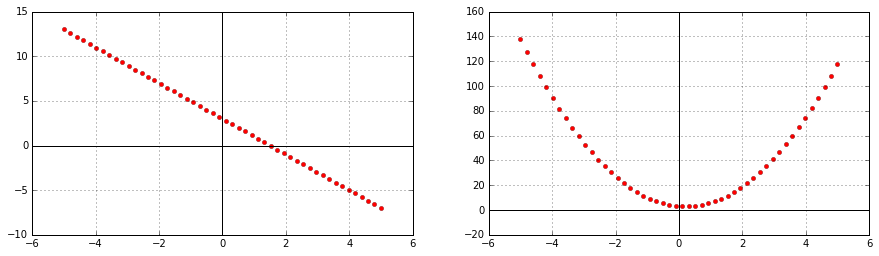

In [18]:
# generate a simple table of values to plot
x = np.linspace(-5,5,50)                  # range of input for our functions

# generate line table
w_0 = 3
w_1 = -2
y = w_0 + w_1*x
line_table = np.stack((x,y),axis = 1)  # make table of values for our function

# parabola table
w_0 = 3
w_1 = -2
w_2 = 5
y = w_0 + w_1*x + w_2*x**2
parabola_table = np.stack((x,y),axis = 1)    # make table of values for our function

# plot these elementary functions 
fig = plt.figure(figsize = (15,4))
ax1 = fig.add_subplot(121); ax2 = fig.add_subplot(122); 
ax1.scatter(line_table[:,0],line_table[:,1],c = 'r',linewidth = 0.2)
ax2.scatter(parabola_table[:,0],parabola_table[:,1],c = 'r',linewidth = 0.2)

# clean up plot, plot x and y axes
s = np.linspace(-10,10)
ax1.grid(True, which='both'),ax2.grid(True, which='both')
ax1.axhline(y=0, color='k'),ax2.axhline(y=0, color='k')
ax1.axvline(x=0, color='k'),ax2.axvline(x=0, color='k')

plt.show()

## 1.3  Higher dimensions - same deal

This duality - of viewing a function via its equation or its table of values - holds as is regardless of how many inputs our function has.

For example, a line that takes in two inputs ($x_1$ and $x_2$ instead of just $x$) is usually called a *plane* or *hyperplane* - and its equation generally looks like this

$$w_0 + w_1x_1 + w_2x_2 = y $$

where $w_0$, $w_1$, and $w_2$ are tunable weights.  For any particular values of these weights we can write out a table of values, or plot it (this time in 3d).  For example, if we set $w_0 = 3$, $w_1 = -2$, and $w_2 = 0.5$ we can make its complete table of values like this

$$\begin{array}{c|c}
~~ \text{Input} ~(x) & \text{Output}  ~~ (y = 3 -2 x_1 + 0.5x_2) \\
\hline (0,0) & 3 \\
\ (1,2) & 0 \\
\ (8.7,-3.42) & -16.11 \\
\vdots & \vdots\\
\end{array}$$

or plot a shortened list of its table of values as in the next Python cell.

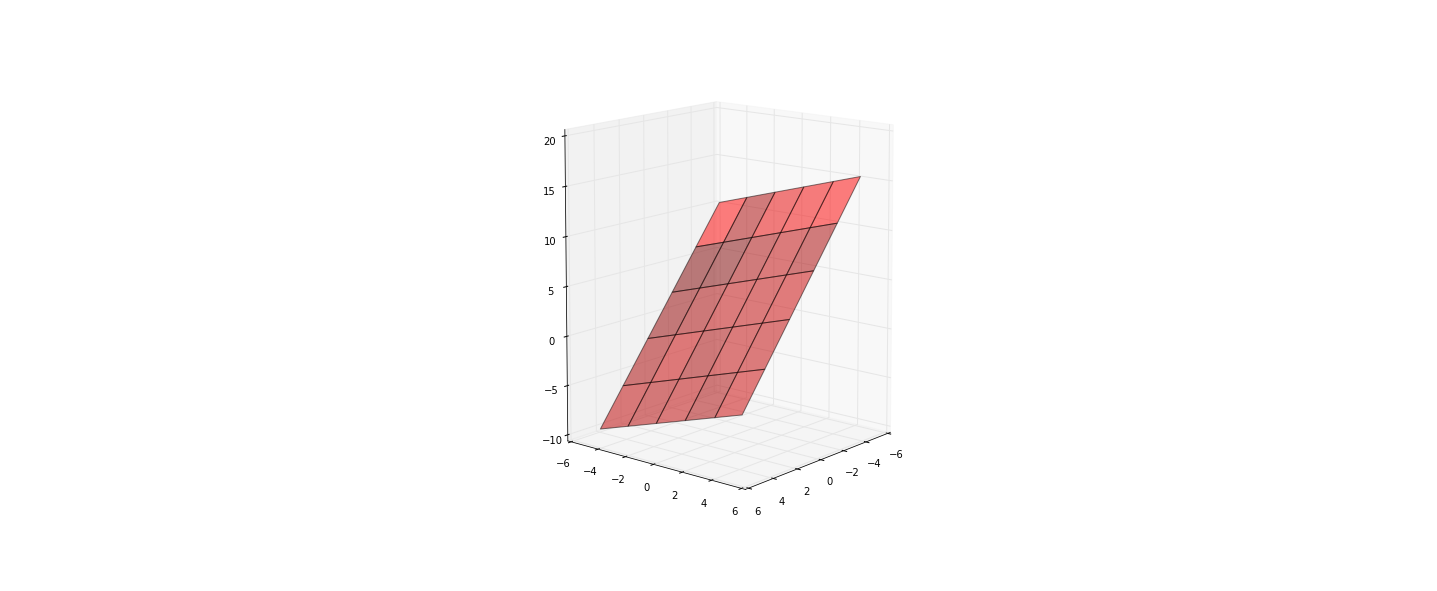

In [4]:
# generate a simple table of values to plot
s = np.linspace(-5,5,50)                  # range of input for x1 and x2 - our inputs 
x_1,x_2 = np.meshgrid(s,s)

# generate line table
w_0 = 3
w_1 = -2
w_2 = 0.5
y = w_0 + w_1*x_1 + w_2*x_2
line_table = np.stack((x_1,x_2,y),axis = 1)  # make table of values for our function

# plot these elementary functions 
fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(131)              # add empty panel to center plot
ax.axis('off')
ax = fig.add_subplot(133)              # add empty panel to center plot
ax.axis('off')
ax1 = fig.add_subplot(132,projection='3d') 
ax1.plot_surface(line_table[:,0],line_table[:,1],line_table[:,2],alpha = 0.5,color = 'r')

# clean up plot, set viewing angle
ax1.grid(True, which='both')
ax1.view_init(10,40)

plt.show()

A higher dimensional parabola works analagously.  The general equation with 2 inputs looks like 

$$w_0 + w_1x_1 + w_2x_2 + w_3x_1x_2 + w_4x_1^2 + w_5x_2^2 = y $$


For any weight setting we can write out a complete table of values, or plot a small section of the table as in the next Python cell (where we've set $w_0 = 3$, $w_1 = -2$, $w_2 = 0.5$, $w_3 = 1.3$, $w_4 = -0.3$, and $w_5 = 4$.

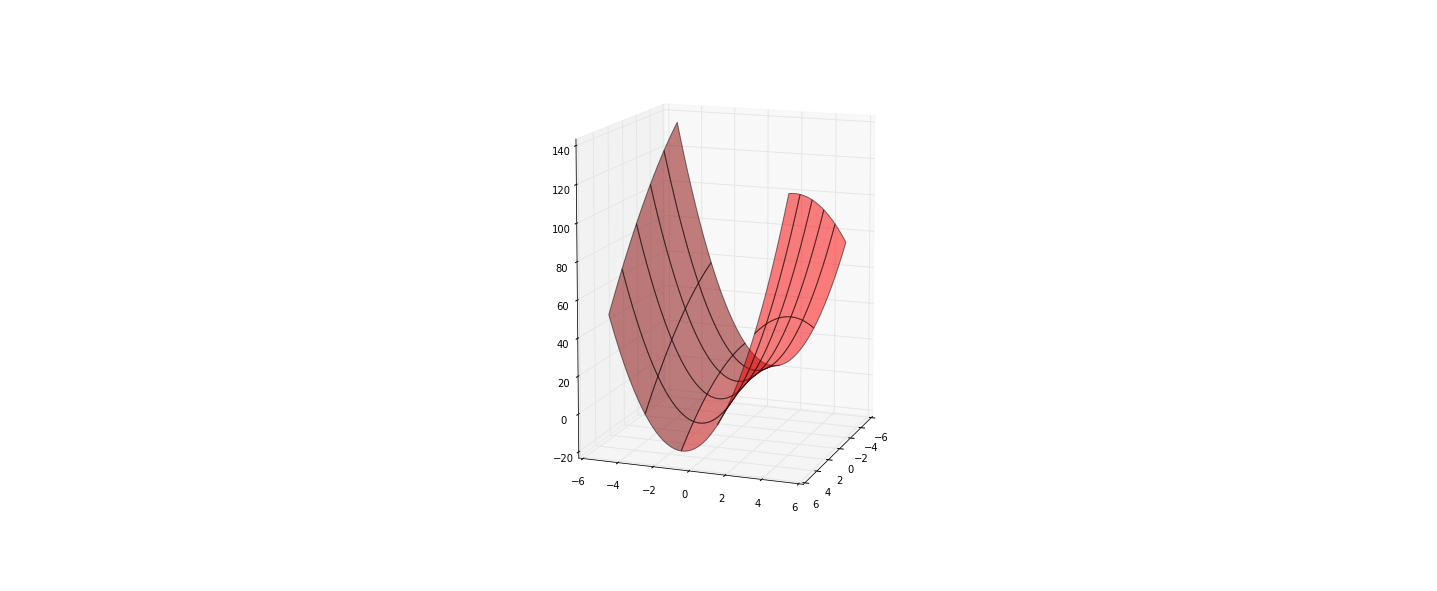

In [5]:
# generate a simple table of values to plot
s = np.linspace(-5,5,50)                  # range of input for x1 and x2 - our inputs 
x_1,x_2 = np.meshgrid(s,s)

# generate line table
w_0 = 3
w_1 = -2
w_2 = 0.5
w_3 = 1.3
w_4 = -0.3
w_5 = 4
y = w_0 + w_1*x_1 + w_2*x_2 + w_3*x_1*x_2 + w_4*x_1**2 + w_5*x_2**2
line_table = np.stack((x_1,x_2,y),axis = 1)  # make table of values for our function

# plot these elementary functions 
fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(131)              # add empty panel to center plot
ax.axis('off')
ax = fig.add_subplot(133)              # add empty panel to center plot
ax.axis('off')
ax1 = fig.add_subplot(132,projection='3d') 
ax1.plot_surface(line_table[:,0],line_table[:,1],line_table[:,2],alpha = 0.5,color = 'red')

# clean up plot, set viewing angle
ax1.grid(True, which='both')
ax1.view_init(10,20)

plt.show()

## 1.4  Which view of a function is best?

If we could only choose one, which would we rather have: the equation of a function or a table consisting of all its input/output pairs?

Well, if we had the equation could always generate its associated table of input/output values.  Right?  So thats a big plus to having the equation - if we have it we can get the table for free.

How about the reverse - if we had a table of values, could we intuit its equation easily?  In other words, if we have the table do we get the equation for free?

Well, by just examining a function's raw table its not exactly obvious how to draw conclusions visa-vis its associated equation.  That is - just eye-balling a raw table like this one 

$$\begin{array}{c|c}
~~ \text{Input} ~ (x) &  ~~ \text{Output} ~~ (y) \\
\hline 0 & 3 \\
\ -0.4 & 3.8 \\
\ 5.2 & -7.2 \\
\vdots & \vdots\\
\end{array}$$

might not lead us to any useful conclusions regarding an equation.

But we could plot the table of values - or some portion of it - as we've been doing in this Section.  Using the plot we could then try to determine the equation 'by eye'.  That would be much easier than just looking at a table of numbers at least.

Lets plot a few examples and see if this is do-able.  

Don't look at any equations in the Python next cell!  Just examine the output graphs - i.e., the table of values for each example - the print out of the Python cell below.  See if you can guess the equation associated with each.  After you've made your guess you can scroll down a bit to see the associated equations.

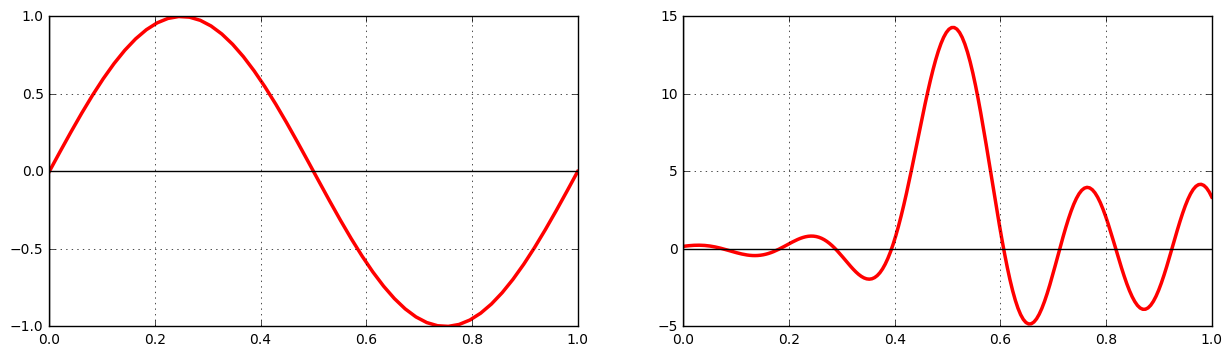

In [61]:
# generate a simple table of values to plot
x = np.linspace(0,1,50)                  # range of input for our functions
wave = np.sin(2*np.pi*x)
wave_table = np.stack((x,wave),axis=1)    # make table of values for our function

# load in a toughy to plot
guess_this_table = np.loadtxt('guess_this.txt',delimiter=',')

# plot these elementary functions 
fig = plt.figure(figsize = (15,4))
ax1 = fig.add_subplot(121); ax2 = fig.add_subplot(122); 
ax1.plot(wave_table[:,0],wave_table[:,1],c = 'r',linewidth = 2.5)
ax2.plot(guess_this_table[:,0],guess_this_table[:,1],c = 'r',linewidth = 2.5)

# clean up plot, plot x and y axes
s = np.linspace(-10,10)
ax1.grid(True, which='both'),ax2.grid(True, which='both')
ax1.axhline(y=0, color='k'),ax2.axhline(y=0, color='k')
ax1.axvline(x=0, color='k'),ax2.axvline(x=0, color='k')

plt.show()

So having plotted the table of values for both functions, you may have been able to spot the equation for the example on the left.  It is 

$$y=\text{sin}(2\pi x)$$

Did you correctly guess 'sine' for this one?  You might have missed the '2 $\pi$ part' on the inside - but close enough.  Great work.

But how about the second example on the right?  A little more challenging to guess the equation of this table of values - wouldn't you agree?  If somehow you guessed the equation associated to this table of values which is

$$y = e^{3x}\frac{\text{sin}(3\pi (x-0.5))}{3{\pi}^2(x-0.5)}$$

then you definitely deserve a pat on the back.  Regardless - wouldn't you agree that this one is much harder?  

The point here is that even when we only have a *single* input, in general identifying a function's equation by plotting its table of values is very difficult -  even impossible - to do 'by eye'.  And again to emphasize - *we could only even attempt this feat for functions of one or two inputs, since we can't meaningfully visualize functions that take in three or more inputs, they're too high dimensional*.  

So in general we can't just look at a table of values - whether in the raw or by graphing it - and hope to accurately guess at the associated equation.  Is there another way to accurately estimate the equation of a table?  There is - and its the basis for all nonlinear machine learning.  Its called *function approximation*, and is a topic we investigate at length starting in the next Section.

For now - however - the equation view of things is clearly superior.  Given the equation of a function we can generate its table of values immediately, but as to the converse - using the table to get at an equation - its not yet obvious how to go about this.

> If we have a function's equation we can always generate its associated table of values, however the reverse isn't so straight forward.  That is, given a table of values it isn't yet clear how - in general - we can infer an associated equation.  So in this important sense the equation view of a function outstrips the table view, and is superior.

## 1.5  What does all this have to do with supervised learning?

We can describe supervised learning - that is regression and classification - directly in terms of our 'two views of functions' like this: the aim of supervised learning is to recover the equation of a function based on *noisy* samples of its table of values.

> In terms of our 'two views of functions', the aim of supervised learning is to recover the equation of a function based on *noisy* samples of its table of values.

So with supervised learning, we have a table of values representing a function.  But the values we are given are (likely) noisy, and we have a limited supply of them.  This factoid is illustrated figuratively in the animated gif below for one particular regression dataset.

<img src="demo_images/regr_to_func_approx.gif\" width=300 height=300/>

The gif begins by illustrating a prototypical nonlinear regression dataset - this consists of a small sample of sinusoidal input/output pairs, with *noise* being added to the output. 'Noise' here means that each point has been nudged a little above - or below - where the true function is.

The next slide in the animation then shows the same dataset - only with the noise removed.  The points drop down / raise up to the true sinusoidal function.  Where as the regression dataset table of values contained noisy samples of the true function, each of the values in this table are now true input/output pairs.  But we still only have a small sample of all such pairs.  The final slide in the animation fills out the table completely and shows the true, underlying function table of values.  

Up next - an analagous animation for two-class classification.  Everything here is entirely similar to the regression case animated above, shown for one particular nonlinear classification dataset.  This is because - remember - classification *is* a regression problem, one where our output is constrained to strictly take on integer values.  

<img src="demo_images/class_to_func_approx_2d_slow.gif\" width=350 height=300/>

<img src="demo_images/class_to_func_approx_3d.gif\" width=400 height=300/>

In the first slide of the animations we see a prototypical classification dataset - a noisy table of values - from both 'above' (in the top gif) and 'the side' (bottom gif).  Note that with classification a point is 'noisy' if it is mislabeled - that is if its label takes on the wrong integer value.  So here that means that a noisy point is one that - if on the bottom step, should be on the top - and vice versa.

In the next slide of the animation we remove *noise* from all points - so every point now lies on its correct level.  At this point we have a clean sample of table values for our function, but only a sampling of them.

Finally we transition to the final slide - showing the complete table of values for our desired function.  The difference between this and the final slide of the regression gif, is that with classification we deal with *discontinuous step functions* which can have linear or nonlinear boundaries between their steps.

## 1.7  What's next?

Finding the equation of a complete, noise free table of values is challenging - as we discussed in Section 1.5.   Supervised learning is just doing this - finding an equation - only our table of values (our data) is much smaller, and is potentially noisy.  It then stands to reason that supervised learning is *harder* - we don't have as much data as in the former case, and that data is (possibly) polluted with noise.  

But if don't even know how to tackle the former problem yet - the one that seems easier - how can we hope to tackle the latter - supervised learning?  

In the next post we start off by introducing the tools needed to accurately determine the equation of a function given its complete table of values.  We will then see that - because supervised learning is so similar in concept to this problem - that we can carry over the exact same set of tools to tackle supervised learning.  This toolset is called *function approximation*, and is where (perhaps familiar) terms like *kernels*, *neural networks*, and *trees* enter the picture.